In [61]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_goldfeldquandt
from sklearn.model_selection import GridSearchCV
import numpy as np
from scipy.stats import norm
import joblib
import math

#### Reading the dataset and viewing the top 5 rows

In [40]:
df=pd.read_csv("LengthOfStay.csv")
df.head()

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay
0,1,8/29/2012,0,F,0,0,0,0,0,0,...,192.476918,12.0,1.390722,30.432418,96,6.5,4,9/1/2012,B,3
1,2,5/26/2012,5+,F,0,0,0,0,0,0,...,94.078507,8.0,0.943164,28.460516,61,6.5,1,6/2/2012,A,7
2,3,9/22/2012,1,F,0,0,0,0,0,0,...,130.530524,12.0,1.065750,28.843812,64,6.5,2,9/25/2012,B,3
3,4,8/9/2012,0,F,0,0,0,0,0,0,...,163.377028,12.0,0.906862,27.959007,76,6.5,1,8/10/2012,A,1
4,5,12/20/2012,0,F,0,0,0,1,0,1,...,94.886654,11.5,1.242854,30.258927,67,5.6,2,12/24/2012,E,4


#### Displaying the columns

In [32]:
col=df.columns
col

Index(['eid', 'vdate', 'rcount', 'gender', 'dialysisrenalendstage', 'asthma',
       'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor',
       'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo',
       'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro',
       'creatinine', 'bmi', 'pulse', 'respiration',
       'secondarydiagnosisnonicd9', 'discharged', 'facid', 'lengthofstay'],
      dtype='object')

#### Description of the variables.
<p style="line-height: 1.5; font-size:15px"> 1. vdate: first visiting date of the patient <br>
2. rcount : No of readmissions of the patient <br>
3. gender : sex of the patient <br>
4. dialusisrenalendstage : Binary variable whether the patient has taken dialysis for end stage renal disease. (1: Yes , 0: No) <br>
5. asthma : Binary variable whether the person has asthma<br>
6. irondef : Binary variable whether the person has iron deficiency<br>
7. pneum : Binary variable whether the person has pneumonia<br>
8. substancedependence : Binary variable whether the person has addiction to drugs and smoking <br>
9. psychologicaldiseasemajor : Binary variable whether the patient has any major psychological disease.<br>
10. depress : Binary variable whether the patient has depression<br>
11. psychother : Binary varible whether the patient has any other psychological disorder <br>
12. fibriosisandother : Binary variable whether the paient has fibriosis <br>
13. manutrition : Binary variable whether the patient has malnutrition <br>
14. hemo : whether the person has any haemoglobin issues. <br>
15. hematocrit : volume percentage of rd blood cells of patient <br>
16. neutrophils : No of a certain white blood cells <br>
17. sodium : Sodium level <br>
18. glucose: glucose level <br>
19. bloodureanitro : Amount of urea nitrogen in blood <br>
20. creatinine : amount of waste product produced due to breakdown of muscle tissue and protein digestion <br>
21. bmi : body mass index<br>
22. pulse: pulse rate of the patient <br>
23. respiration :breathing rate of the patient <br>
24. secondarydiagnosisonidc9 : code referring to the primary diagnosis already existing during the time of admission <br>
25. discharged: date on which the patient was discharged from hospital <br>
26. facid : Facility Id (Multicategorical : A,B,C,D,E )  <br>
27. lengthofStay : No of days the patient took for healing and had to stay in the hospital (target variablr)</p>

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   eid                         100000 non-null  int64  
 1   vdate                       100000 non-null  object 
 2   rcount                      100000 non-null  object 
 3   gender                      100000 non-null  object 
 4   dialysisrenalendstage       100000 non-null  int64  
 5   asthma                      100000 non-null  int64  
 6   irondef                     100000 non-null  int64  
 7   pneum                       100000 non-null  int64  
 8   substancedependence         100000 non-null  int64  
 9   psychologicaldisordermajor  100000 non-null  int64  
 10  depress                     100000 non-null  int64  
 11  psychother                  100000 non-null  int64  
 12  fibrosisandother            100000 non-null  int64  
 13  malnutrition   

#### Checking for missing values : printing those col names with missing values

In [34]:
null_values_per_column = df.isnull().sum()
null_values_per_column[null_values_per_column > 0]

Series([], dtype: int64)

##### No missing values

#### Separating the features X and the target variable y.
<p style="font size :15px"> Label Encoding the categorical variables </p>

In [ ]:
label_encoder = LabelEncoder()
scaler = StandardScaler()
hotencoder = OneHotEncoder(sparse=False, drop=None)
df.iloc[:,-13:-5] = scaler.fit_transform(df.iloc[:,-13:-5])
X=pd.DataFrame()
# List of columns to exclude
exclude_columns = ["gender", "eid", "vdate",'facid', "discharged", "lengthofstay"]

# Create a new DataFrame X with columns not in the exclude_columns list
X = df[[col for col in df.columns if col not in exclude_columns]]
X['gender_enc'] = label_encoder.fit_transform(df['gender'])
X['facid_enc'] = label_encoder.fit_transform(df['facid'])
X['rcount']= df['rcount'].replace('5+',5)
X['rcount'] = X['rcount'].astype(int)


y=df['lengthofstay']

#### Checking the outliers from scatterplots of the independent variables

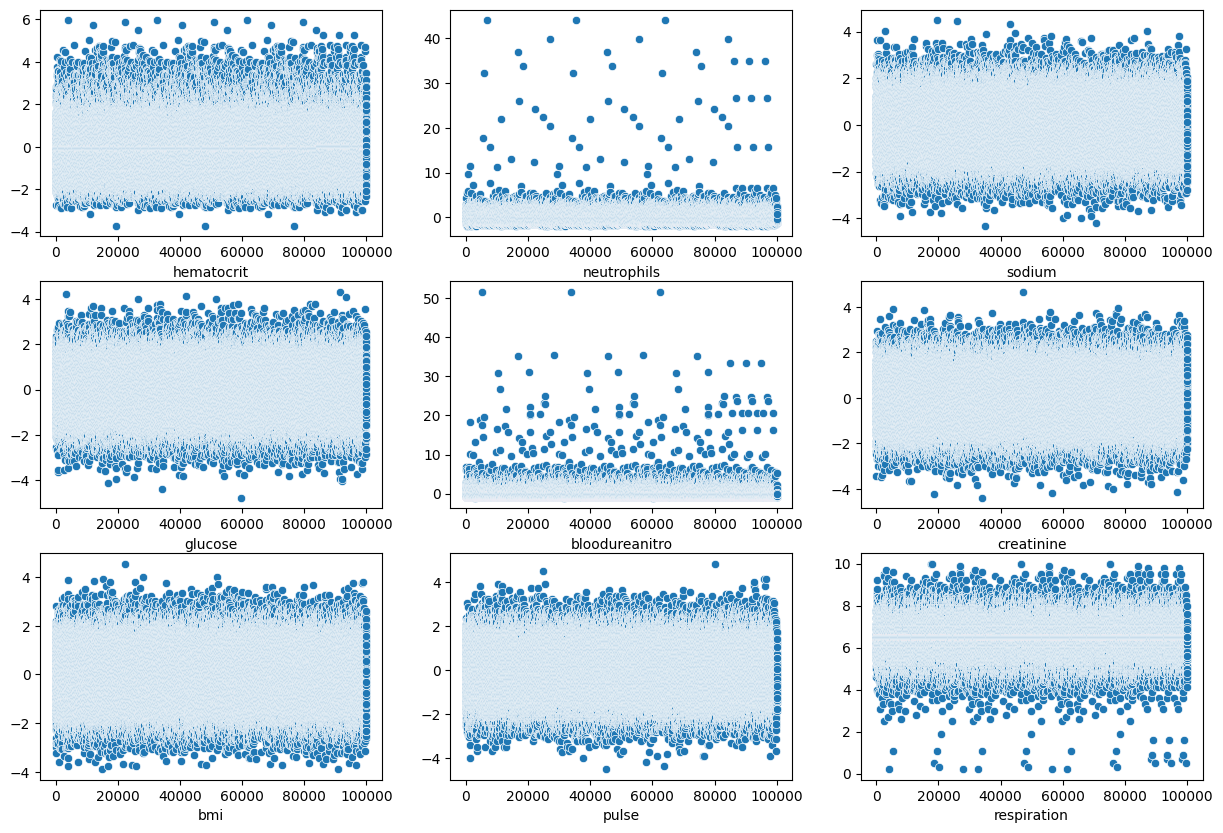

In [36]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over the features in X and plot each feature against the index
for i, feature in enumerate(X.columns[-12:-3]):
   
    sns.scatterplot(ax=axes[i], data=X.reset_index(), x='index', y=feature)  # Use the reset 'index' column
    
    axes[i].set_ylabel("")
    axes[i].set_xlabel(feature)


##### The scatterplots clearly show that there areoutliers especially in bloodureanitro and neutrophils

#### Removing the outliers by IQR method. 

In [42]:
for feature in X.columns[-12:-3]:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = X[feature].quantile(0.25)
    Q3 = X[feature].quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    if feature=='respiration':
        upper_bound = max(X['respiration'])
    condition = (X[feature] >= lower_bound) & (X[feature] <= upper_bound)
    X = X[condition]
    y = y[condition]

#### Re-plotting the scatterplots to make sure that the outliers have been removed

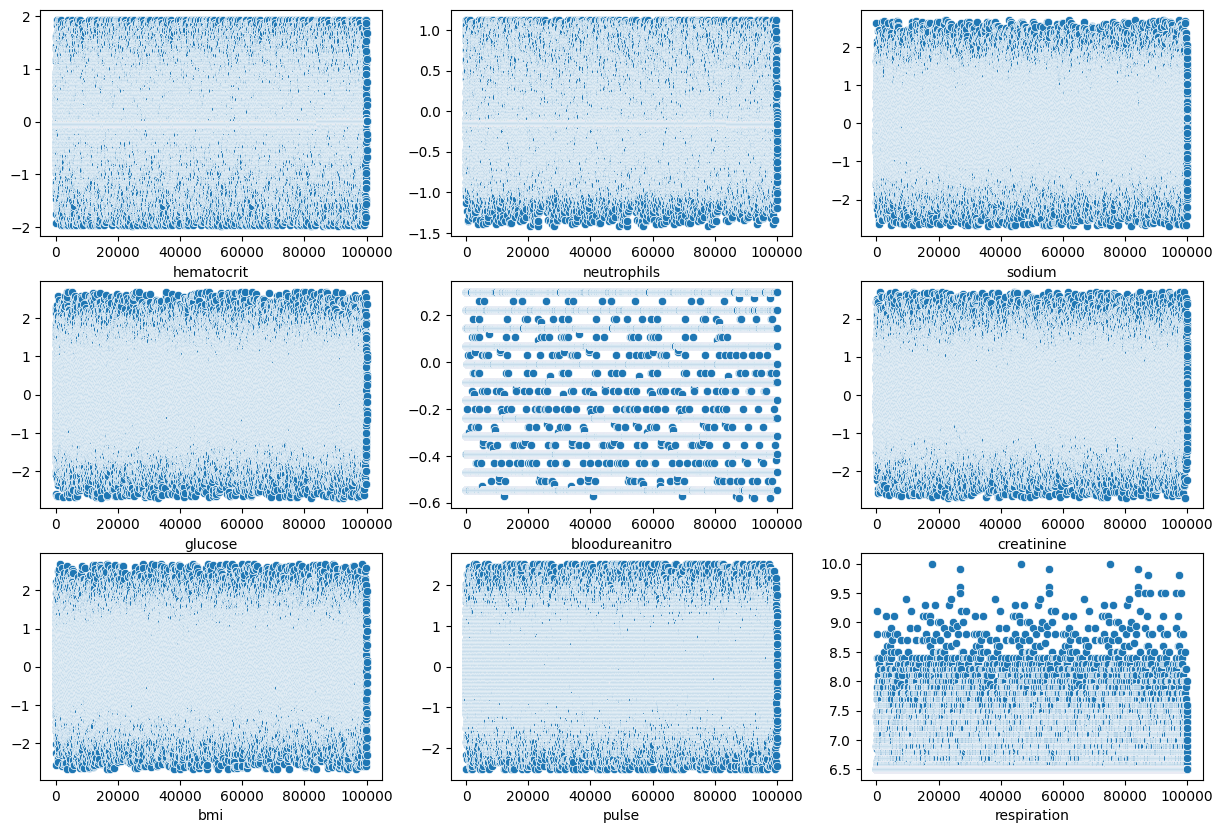

In [43]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over the features in X and plot each feature against the index
for i, feature in enumerate(X.columns[-12:-3]):
   
    sns.scatterplot(ax=axes[i], data=X.reset_index(), x='index', y=feature)  # Use the reset 'index' column
    
    axes[i].set_ylabel("")
    axes[i].set_xlabel(feature)

#### Pie charts showing the distribution of the Qualitative features as well as the target variable

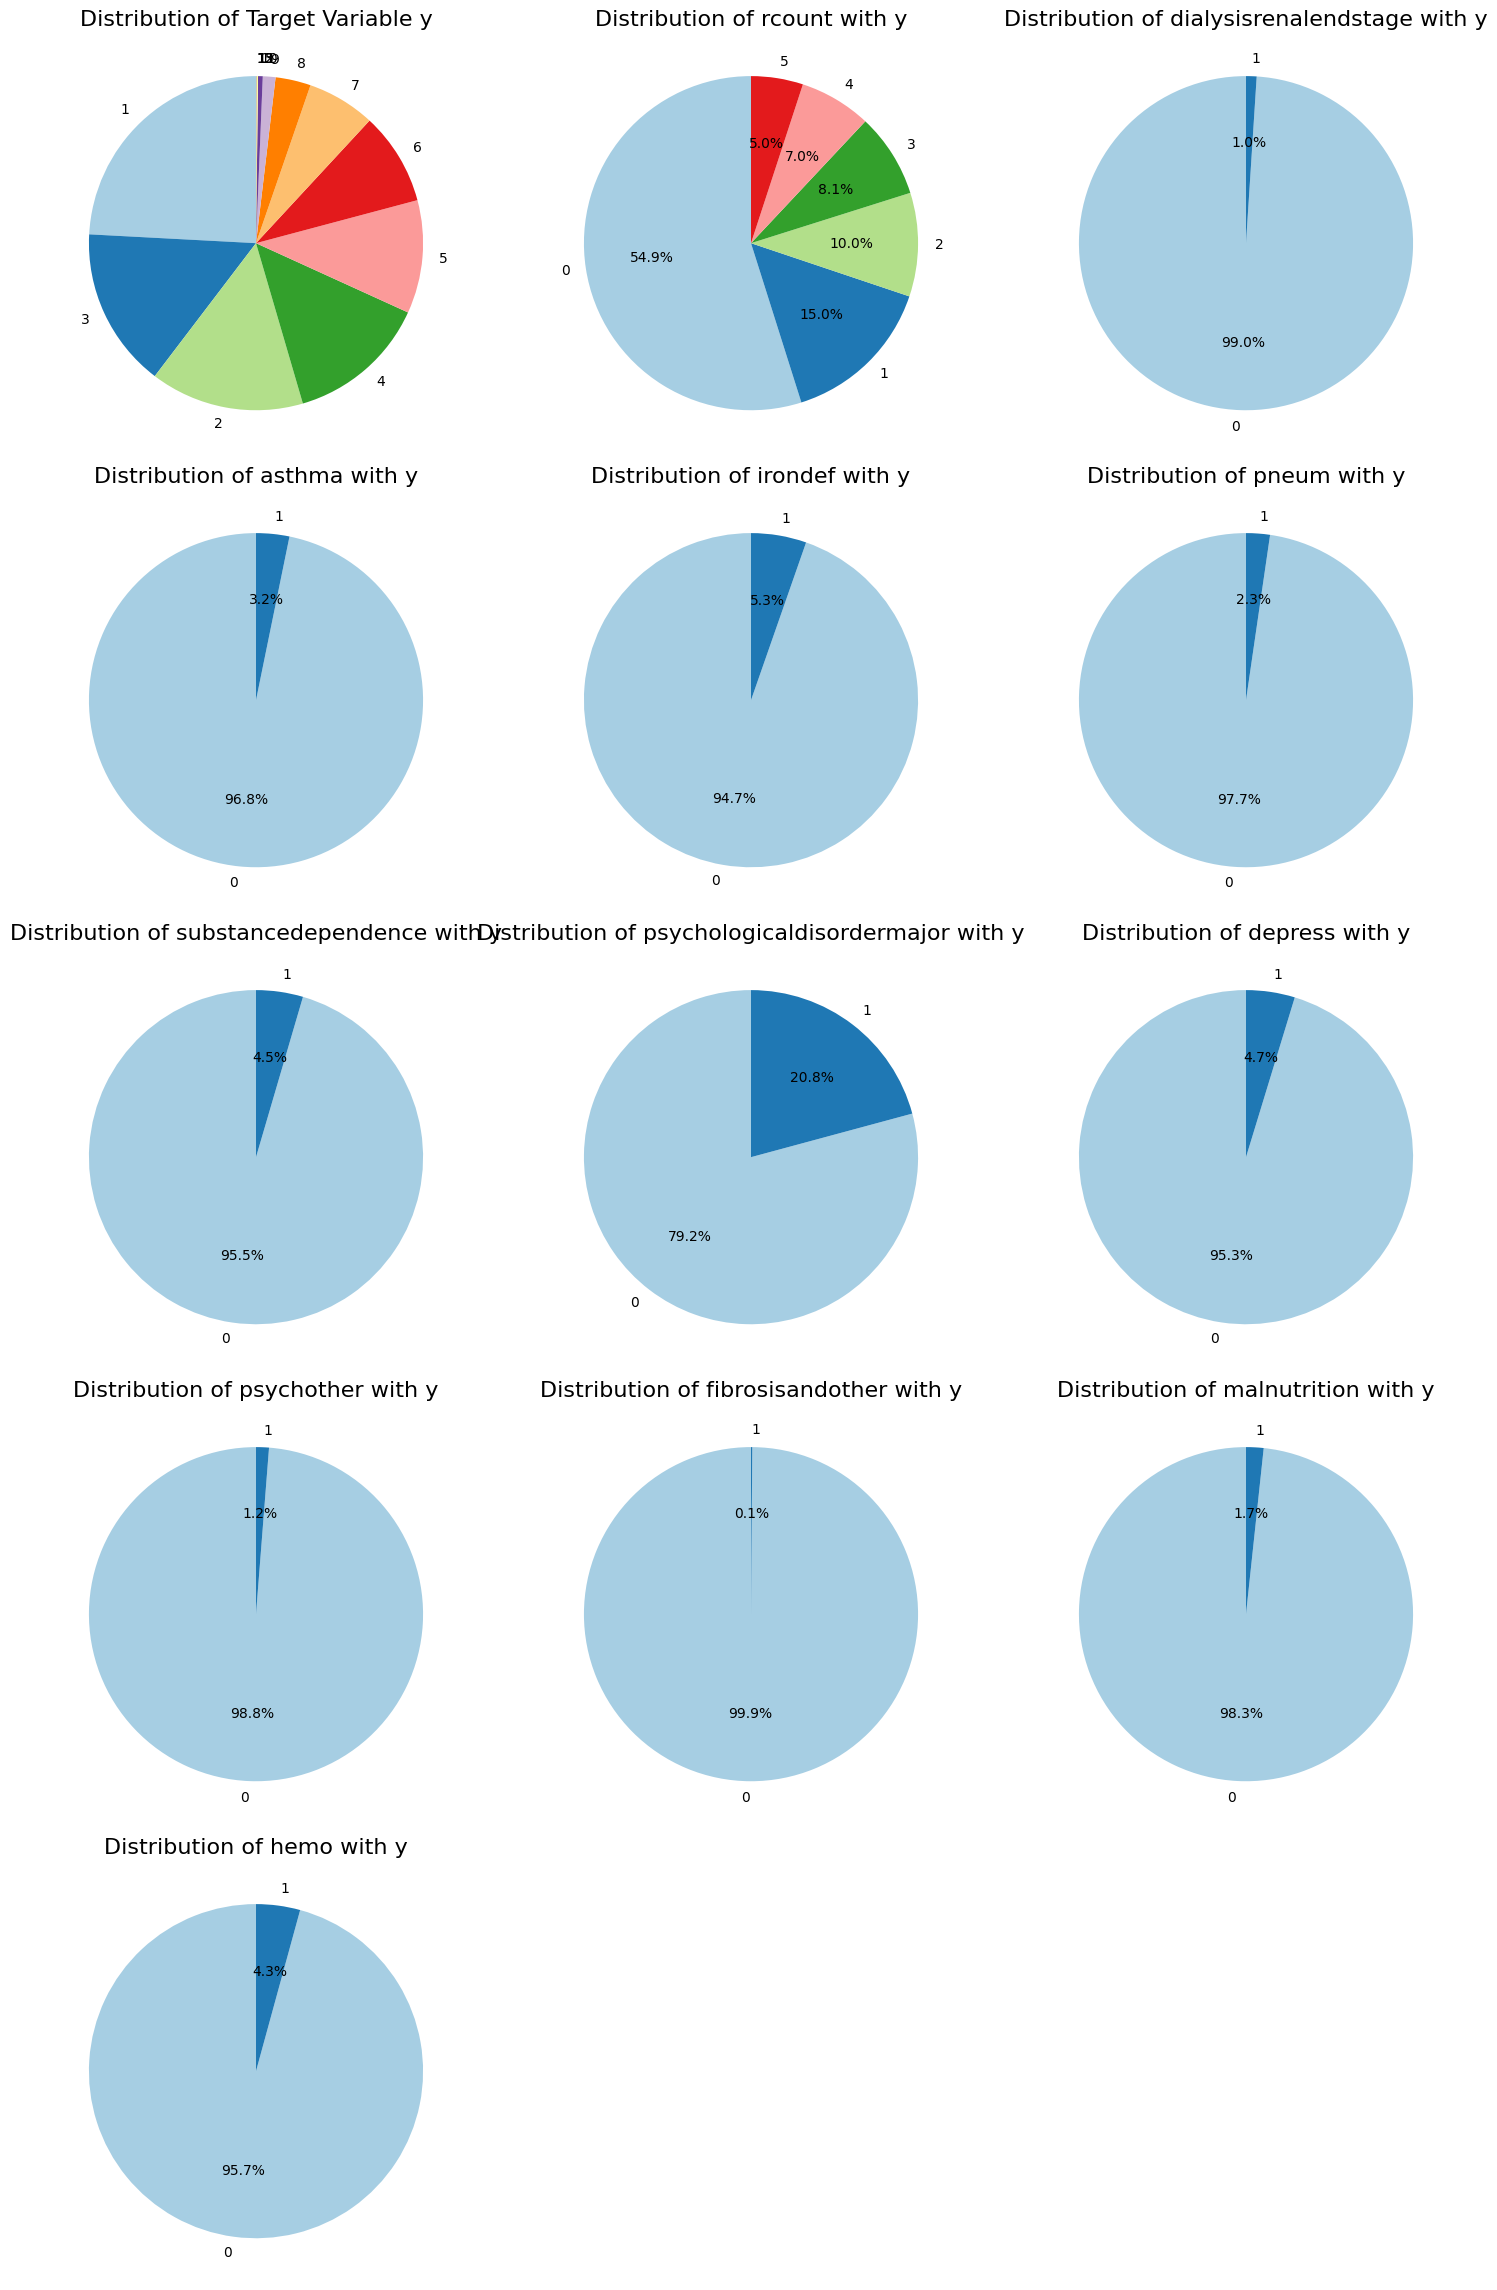

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already defined X and y
# Identify the qualitative (categorical) features
qualitative_features = X.columns[:-12]

# Create subplots for each qualitative feature plus one for y
n_features = len(qualitative_features)
n_rows = (n_features // 3) + 1  # Calculate the number of rows needed
fig, axes = plt.subplots(nrows=n_rows, ncols=3, figsize=(15, n_rows * 5))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot the pie chart for the target variable y
y_counts = y.value_counts()
axes[0].pie(y_counts, labels=y_counts.index,  startangle=90, colors=plt.cm.Paired.colors)
axes[0].set_title('Distribution of Target Variable y', fontsize=16)

# Iterate over each categorical feature and create pie charts
for i, feature in enumerate(qualitative_features):
    # Create a DataFrame that counts occurrences of each category per target variable
    feature_counts = pd.crosstab(X[feature], y)
    
    # Use the first category counts for the pie chart
    values = feature_counts.sum(axis=1)  # Total counts for each category

    # Plot pie chart on the respective axis
    
    axes[i + 1].pie(values, labels=values.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    axes[i + 1].set_title(f'Distribution of {feature} with y', fontsize=16)

# Remove any unused subplots
for j in range(i + 2, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for titles
plt.show()


#### Boxplots of vrious fetures showing how the traget variable is related with various classes of the features.

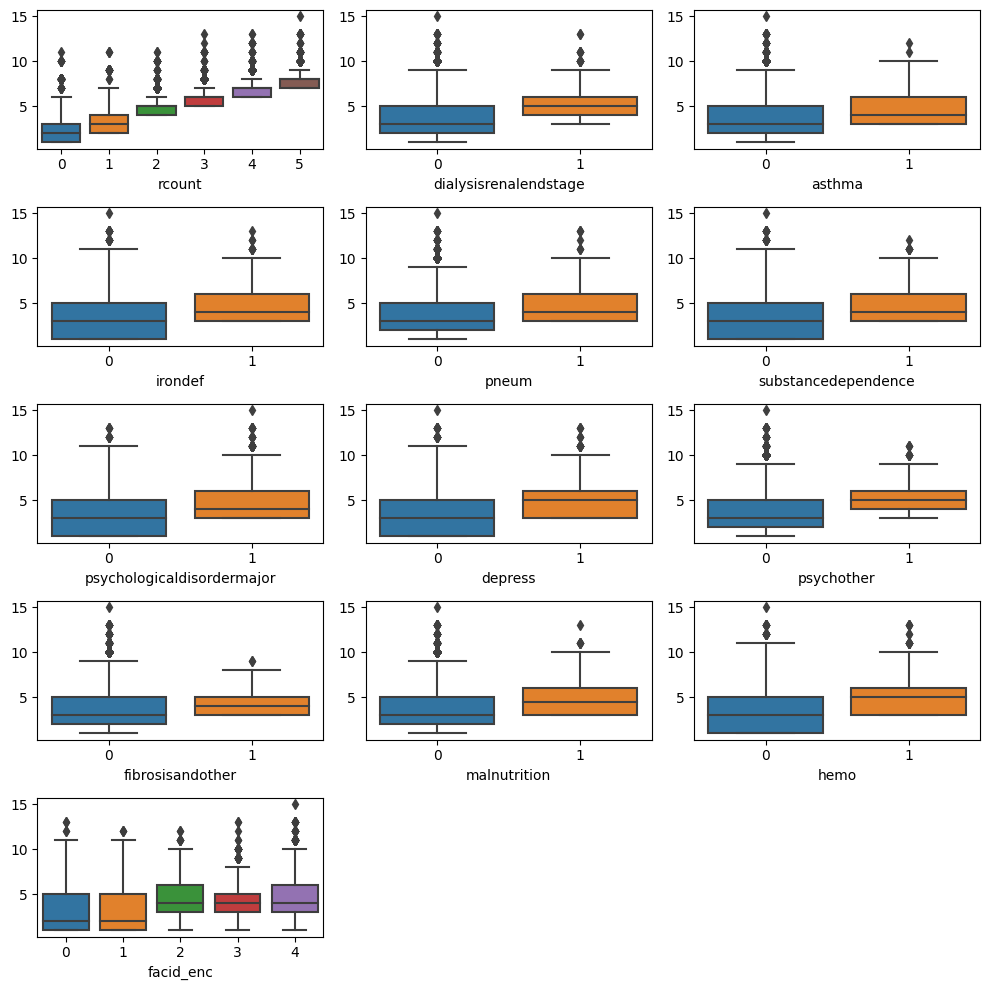

In [56]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over the features in X and plot each feature against the target variable `y`
for i, feature in enumerate(list(X.columns[:-12])+["facid_enc"]):
    sns.boxplot(ax=axes[i], x=X[feature], y=y)  # Plot the feature against target variable `y`
    
    axes[i].set_ylabel("")  # Removing the y-axis label
    axes[i].set_xlabel(feature)  # Setting the x-axis label to the feature name
# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()


<p style="font-size:12px"><strong>As we can see as the rcount increases, the median of y corresponding to each value increases depictibg positive correlation. Facility 2 has higher median of y. Similar interpretation for others.</strong></p>

#### Checking multicollinearity 
<p style="font-size:15px"> Multicollinearity means whether the features are dependent on each other. So we plot Correlation Matrix of the features to find out the correlation  between them. If there is no multicollinearity then the correlation must be 0 </p>

In [ ]:
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", square=True, cbar=True)
plt.title('Correlation Heatmap')
plt.show()


#### Checking variance inflation factors (VIF) for each column. 

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


#### Splitting thedata into test and train data
<p style="font-size:15px"> 80% of the data is in train set and the rest 20% is in test set. we will also one hot encod the facid column  as it is multicategorical column</p>

In [57]:
X1=X.copy()
X=pd.get_dummies(X, columns=['facid_enc'], drop_first=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Fitting the linear regression model on the data and find its performance on test data

In [58]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

Mean Squared Error: 0.8202934885683797
R-squared Score: 0.8328393318608389


#### Checking the accuracy on train data 

In [ ]:
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

<p style="line-height: 1.5; font-size:18px"> <strong>Checking Homoscedasticity  by data visualization</strong> <br> Homoscedasticity means that the error variances are equal throughout. So we plot the fiited vs residuals graph. If the points are clustered at the beginning and scattered at the end (diverging), that means the error varaince increases. If the points are converging then the error variance is decreasing. These shows heteroscedasticity. If not, then it is homoscedasticity </p>

In [ ]:
fitted=model.predict(X_train)
residuals = y_train-fitted
st_resi=(residuals-np.mean(residuals))/np.std(residuals)
plt.scatter(fitted, st_resi)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Std Residuals')
plt.title('Standardized Residuals vs Fitted Values')
plt.show()

###### There is no such converging or diverging pattern, it is possibly homoscedastic

<p style="line-height: 1.5; font-size:18px"> <strong>Checking Homosccedasticity using Goldfeld-Quant Test</strong></p>

In [ ]:
gq_test = het_goldfeldquandt(y, X1)

# Extract the results
test_statistic = gq_test[0]
alternative_hypothesis = gq_test[2]# Test statistic
p_value = gq_test[1]          # p-value
print(p_value)
print("We accept the null hypothesis that there is homoscedasticity the variance of errors")

<p style="line-height: 1.5; font-size:18px"> <strong>Checking Autocorrelation by data visualization</strong> <br> Autocorrelation means that the errors are not independent. So we plot the graph u_t vs u_t-1 where u_t is the residual at t_th data point t=2(1)n. If the errors are dpendent then we will see some increasing or pattern in the graph (neg/pos correlation). If it is random then we can see there is possibly bo autocorrelation </p>

In [ ]:
plt.scatter(residuals[:-1], residuals[1:])
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

##### Purely random. Possibly no autocorrelation

<p style="line-height: 1.5; font-size:18px"> <strong>Checking Autocorrelation using Run-Test</strong> <br> Here we see the no of runs in the plot of residuals vs index plot. If there are two many runs (changes sign too much) depicting negative correlation and too less runs depicts positive correlation. So we test the null hypothestis that there is no autocorrelation. It can be both two sided and one sided. We normalize the test Statistic which now follows the N(0,1) distribution. If p-value is less than 0.05, we reject the null hypo and accept it otherwise. </p>

In [ ]:

def run_test_autocorrelation(residuals):
    # Calculate the median of residuals
    median = np.median(residuals)
    
    # Create a binary sequence: 1 if residual >= median, 0 if residual < median
    runs = np.where(residuals >= median, 1, 0)
    
    # Count the number of runs (a run is a sequence of consecutive identical elements)
    num_runs = 1  # There's at least one run
    for i in range(1, len(runs)):
        if runs[i] != runs[i - 1]:
            num_runs += 1
    
    # Calculate n1 and n2 (number of observations above and below the median)
    n1 = np.sum(runs == 1)
    n2 = np.sum(runs == 0)
    
    # Expected number of runs
    expected_runs = ((2 * n1 * n2) / (n1 + n2)) + 1
    
    # Variance of the number of runs
    variance_runs = (2 * n1 * n2 * (2 * n1 * n2 - n1 - n2)) / (((n1 + n2)**2) * (n1 + n2 - 1))
    
    # Z-score calculation
    z = (num_runs - expected_runs) / np.sqrt(variance_runs)
    
    # Calculate p-value
    p_value = 2 * (1 - norm.cdf(abs(z)))  # Two-tailed test

    return z, p_value

fitted=model.predict(X_train)
residuals = y_train-fitted

# Perform the Run Test for autocorrelation
z_stat, p_val = run_test_autocorrelation(residuals)
print(f"Run Test Z-Statistic: {z_stat}")
print(f"p-value: {p_val}")

# Interpretation
if p_val < 0.05:
    print("Autocorrelation detected (reject H0). Residuals are not random.")
else:
    print("No significant autocorrelation detected (fail to reject H0). Residuals appear random.")


In [ ]:
sns.kdeplot(data=residuals, fill=True, label='Residuals')

<p style="line-height: 1.5; font-size:18px"> <strong>Fitting the Ridge Regression by choosing the best hyperparameter using GridSearchCV. </strong><br>
Here the hyperparameter is alpha. More the alpha more the penalty in the cost term (shrinks the value of the estimated coefficients) and lesser the chance of overfitting. Too less alpha will increase the chance of underfitting and will increase the bias of the model. Hence we should have an optimum value of alpha. </p>

In [ ]:
ridge_model = Ridge(alpha=0.1)  # You can adjust the alpha value

ridge_param_grid = {
    'alpha': np.logspace(-3, 3, 7)  # Testing different alpha values
}

# Set up Ridge Regression with GridSearchCV
ridge_grid_search = GridSearchCV(estimator=Ridge(random_state=42), 
                                  param_grid=ridge_param_grid,
                                  cv=5, n_jobs=-1, verbose=1)

# Fit Ridge GridSearchCV to the training data
ridge_grid_search.fit(X_train, y_train)

# Get the best parameters for Ridge
best_ridge_params = ridge_grid_search.best_params_
best_ridge_score = -ridge_grid_search.best_score_

print("Best Ridge parameters found:", best_ridge_params)

# Evaluate the best Ridge model on the test data
best_ridge_model = ridge_grid_search.best_estimator_
ridge_y_pred = best_ridge_model.predict(X_test)

# Calculate the test MSE and R-squared for Ridge
ridge_test_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r_squared = r2_score(y_test, ridge_y_pred)
print("Ridge Test Mean Squared Error:", ridge_test_mse)
print("Ridge R-squared:", ridge_r_squared)

<p style="line-height: 1.5; font-size:18px"> <strong>Fitting the Lasso Regression by choosing the best hyperparameter using GridSearchCV. </strong><br>
Here the hyperparameter is alpha. More the alpha more the penalty in the cost term (shrinks the value of the estimated coefficients) and lesser the chance of overfitting. Too less alpha will increase the chance of underfitting and will increase the bias of the model. Hence we should have an optimum value of alpha. </p>

In [ ]:
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha value as needed
lasso_param_grid = {
    'alpha': np.logspace(-3, 3, 7)  # Testing different alpha values
}

# Set up Lasso Regression with GridSearchCV
lasso_grid_search = GridSearchCV(estimator=Lasso(random_state=42), 
                                  param_grid=lasso_param_grid,
                                  cv=5, n_jobs=-1, verbose=1)

# Fit Lasso GridSearchCV to the training data
lasso_grid_search.fit(X_train, y_train)

# Get the best parameters for Lasso
best_lasso_params = lasso_grid_search.best_params_
print("Best Lasso parameters found:", best_lasso_params)


# Evaluate the best Lasso model on the test data
best_lasso_model = lasso_grid_search.best_estimator_
lasso_y_pred = best_lasso_model.predict(X_test)

# Calculate the test MSE and R-squared for Lasso
lasso_test_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r_squared = r2_score(y_test, lasso_y_pred)

print("Lasso Test Mean Squared Error:", lasso_test_mse)
print("Lasso R-squared:", lasso_r_squared)

#### Fitting a decision tree regressor model. Again we will select the best hyper parameters using GridSearchCV  
<p style="font-size:18px">1. max depth: The maximum depth of the tree.
<br>2. min sample split : minimum number of samples required to split an internal node.
<br>3. min  samples leaf: The minimum number of samples required to be at a leaf node.
<br>4. max_leaf_nodes: max no of leaves in the tree</p>

In [ ]:
# Initialize the Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(random_state=42)
param_grid = {
    'max_depth': range(10, 20),
    'min_samples_split': [2, 5, 10, 15, 20],
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
    'min_samples_leaf': [1, 2, 5, 10, 15],
}

# Step 5: Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=tree_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Step 6: Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Step 7: Get the best parameters and score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Negate since we used neg_mean_squared_error

print("Best parameters found:", best_params)
print("Best cross-validated MSE score:", best_score)

# Step 8: Evaluate the best model on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate the test MSE
test_mse = mean_squared_error(y_test, y_pred)
print("Test Mean Squared Error:", test_mse)
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

#### So the best model is the Decision Tree Regressor with the above parameters. We will save it using joblib in pickle file

In [ ]:
joblib.dump('model_1.pkl')
